In [11]:
%matplotlib widget
import numpy as np
from scipy.signal import iirnotch, sosfreqz, tf2sos
import matplotlib.pyplot as plt

In [12]:
# Parameter
fs = 48000  # Sampling-Frequenz
notch_freqs = [70, 140, 210, 280, 350, 420, 490]  # Notch-Frequenz
Q = 30  # Q-Faktor für schmale Bandbreite
order = 2  # gewünschte Filterordnung

In [13]:
# Liste für alle SOS-Sektionen
sos_list = []

# Berechnung der SOS-Sektionen für jede Notch-Frequenz
for freq in notch_freqs:
    # Berechne die Notch-Filter-Koeffizienten für höhere Ordnung
    for _ in range(order // 2):  # Jede zweite Ordnung wird als SOS hinzugefügt
        b, a = iirnotch(freq / (fs / 2), Q)
        sos = tf2sos(b, a)  # Konvertiere in SOS
        sos_list.append(sos)

# Kombiniere alle SOS-Sektionen
sos_combined = np.vstack(sos_list)

### Bilineare-Transformation

```math
H(s) = \frac{s^2 + \omega_0^2}{s^2 + \frac{\omega_0}{Q}s + \omega_0^2}
```

```math
s = \frac{2}{T} \frac{1 - z^{-1}}{1 + z^{-1}}
```

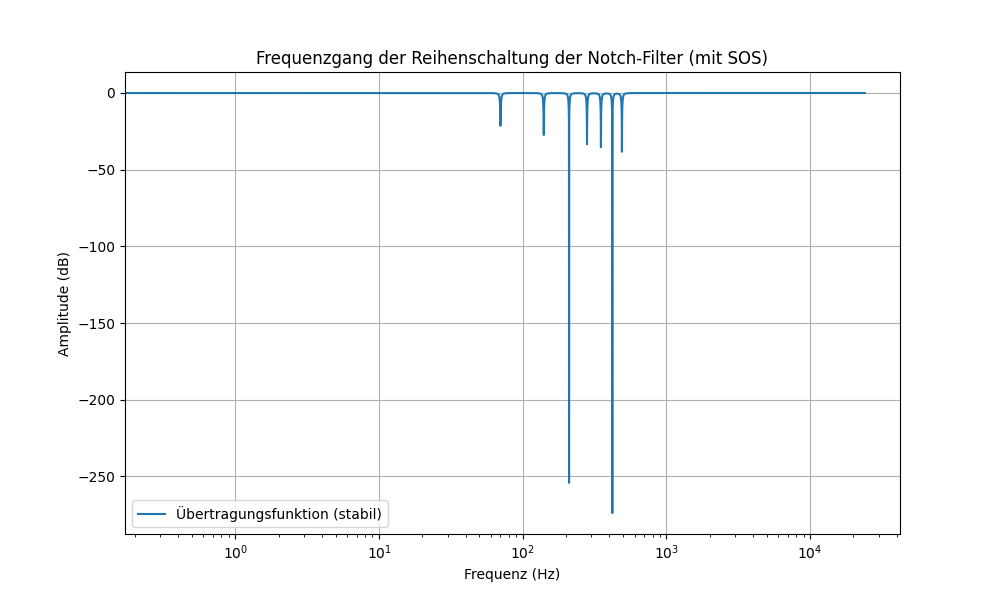

In [19]:
# Frequenzgang des Filters berechnen
w, h = sosfreqz(sos_combined, fs=fs, worN=80000)

# Frequenzgang plotten
plt.figure(figsize=(10, 6))
plt.semilogx(w, 20 * np.log10(np.abs(h)), label="Übertragungsfunktion (stabil)")
plt.title("Frequenzgang der Reihenschaltung der Notch-Filter (mit SOS)")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid()
plt.legend()

In [20]:
# Export der SOS-Koeffizienten in eine Textdatei
with open("sos_coefficients.txt", "w") as file:
    file.write("SOS-Koeffizienten für die Notch-Filter:\n\n")
    for i, section in enumerate(sos_combined, start=1):
        file.write(f"Section {i}:\n")
        file.write(f"b: {section[:3].tolist()}\n")
        file.write(f"a: {section[3:].tolist()}\n")
        file.write("\n")

print("SOS-Koeffizienten wurden in 'sos_coefficients.txt' gespeichert.")

SOS-Koeffizienten wurden in 'sos_coefficients.txt' gespeichert.
